In [9]:
import numpy as np
import numpy as np
import time
import math
from numpy.fft import fft
from numpy import array
from cmath import exp, pi
import matplotlib.pyplot as plt

In [10]:
def DFT_slow(x):
    x = np.asarray(x, dtype=np.float128)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)
    return np.dot(M, x)

def TDMA(a,b,c,f):
    a, b, c, f = tuple(map(lambda k_list: list(map(float, k_list)), (a, b, c, f)))
    alpha = [-b[0] / c[0]]
    beta = [f[0] / c[0]]
    n = len(f)
    x = [0]*n
    for i in range(1, n):
        alpha.append(-b[i]/(a[i]*alpha[i-1] + c[i]))
        beta.append((f[i] - a[i]*beta[i-1])/(a[i]*alpha[i-1] + c[i]))
    x[n-1] = beta[n - 1]
    for i in range(n-1, -1, -1):
        x[i - 1] = alpha[i - 1]*x[i] + beta[i - 1]
    return x

def FFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if N % 2 > 0:
        raise ValueError("x must be a power of 2")
    elif N <= 32: 
        return DFT_slow(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N // 2] * X_odd,
                               X_even + factor[N // 2:] * X_odd])

In [11]:
def f(x, y):
    return 2*x + 2*y - 2*(x**2 + y**2)

def m1(y):
    return 0

def m2(x):
    return 0

def m3(y):
    return 0

def m4(x):
    return 0

def mk(k,y,l):
    return math.sqrt(2/l)*math.sin(pi*k*y/l)

def lambdak(k,h,l):
    return 4/(h**2) * math.sin(pi*k*h/(2*l))**2

def analit(x,y):
    return x*y*(x - 1)*(y - 1)

start = time.time()
lx = 1
ly = 1
Ny = 127
Nx = 127
hy = ly/Ny
hx = lx/Nx
u = np.zeros((Nx+1,Ny+1))
fm = np.zeros((Nx+1,Ny+1))
for i in range(Nx+1):
    for j in range(Ny+1):
        fm[i,j] = f(i*hx,j*hy)
fk = np.zeros((Nx+1,Ny+1))
y = np.arange(Ny+1)/(Ny)
for i in range(1,Nx):
    for k in range(1,Ny):
        for j in range(1,Ny):
            fk[i,k] += hy*fm[i,j]*mk(k,j*hy,ly) 
ck = np.zeros((Nx+1,Ny+1))
for k in range(1,Ny):
    a = [0] * (Ny-1)
    b = [0] * (Ny-1)
    c = [0] * (Ny-1)
    f = [0] * (Ny-1)
    for i in range(1, Ny):
        a[i-1] = 1
        b[i-1] = 1
        c[i-1] = (-2 - hx**2 * lambdak(k,hx,lx))
        f[i-1] = -fk[i,k]* hx**2
    ck[1:Ny,k] = TDMA( a, b, c, f)
for i in range(1,Ny):
    for j in range(1,Nx):
        for k in range(1,Ny):
            u[i,j] += ck[i,k] * mk(k,hy*j,ly)
u[0,:] = 0
u[Nx,:] = 0
u[:,0] = 0
u[0,Nx] = 0
end = time.time() - start
print(end)

7.019763231277466


# ~Численное решение~

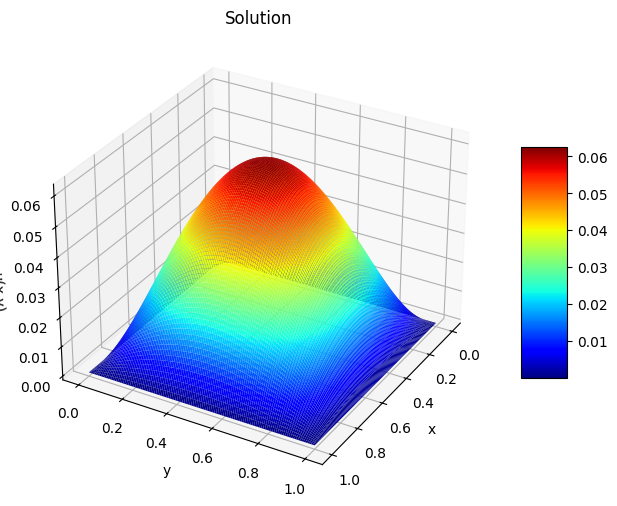

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.10275881e-05 1.21086484e-04 ... 1.21086484e-04
  6.10275881e-05 0.00000000e+00]
 [0.00000000e+00 1.21086484e-04 2.40250961e-04 ... 2.40250961e-04
  1.21086484e-04 0.00000000e+00]
 ...
 [0.00000000e+00 1.21086484e-04 2.40250961e-04 ... 2.40250961e-04
  1.21086484e-04 0.00000000e+00]
 [0.00000000e+00 1.19137241e-04 2.36821510e-04 ... 2.36821510e-04
  1.19137241e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [12]:
x = np.arange(Nx+1)/Nx
y = np.arange(Ny+1)/Ny
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=30) 
surf = ax.plot_surface(X, Y, u, cmap='jet', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
ax.set_title('Solution')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
print(u)

# ~Аналитическое решение~

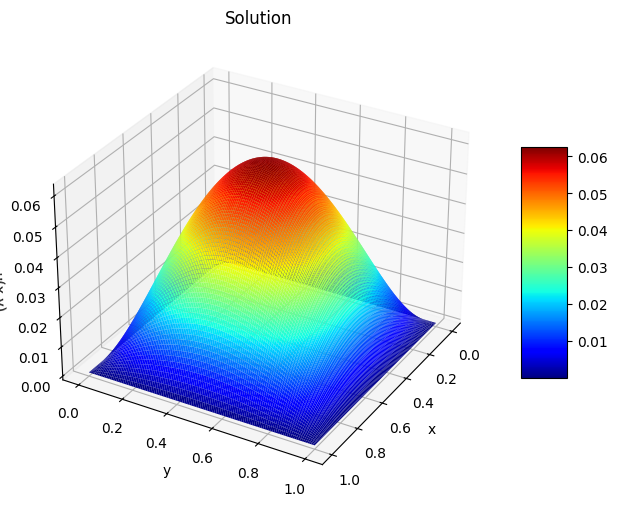

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.10275881e-05 1.21086484e-04 ... 1.21086484e-04
  6.10275881e-05 0.00000000e+00]
 [0.00000000e+00 1.21086484e-04 2.40250961e-04 ... 2.40250961e-04
  1.21086484e-04 0.00000000e+00]
 ...
 [0.00000000e+00 1.21086484e-04 2.40250961e-04 ... 2.40250961e-04
  1.21086484e-04 0.00000000e+00]
 [0.00000000e+00 1.19137241e-04 2.36821510e-04 ... 2.36821510e-04
  1.19137241e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [13]:

x = np.arange(Nx+1)/Nx
y = np.arange(Ny+1)/Ny
an = np.zeros((Nx+1,Ny+1))
for i in range(Nx+1):
    for j in range(Ny+1):
        an[i,j] = analit(x[i],y[j])
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=30) 
surf = ax.plot_surface(X, Y, an, cmap='jet', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
ax.set_title('Solution')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
print(u)

In [14]:
def f(x, y):
    return 2*x + 2*y - 2*(x**2 + y**2)

def m1(y):
    return 0

def m2(x):
    return 0

def m3(y):
    return 0

def m4(x):
    return 0

def mk(k,y,l):
   return math.sqrt(2/l)*np.sin(pi*k*y/l)

def lambdak(k,h,l):
    return 4/(h**2) * math.sin(pi*k*h/(2*l))**2

def analit(x,y):
    return x*y*(x - 1)*(y - 1)

start = time.time()
lx = 1
ly = 1
Ny = 127
Nx = 127
hy = ly/Ny
hx = lx/Nx
u = np.zeros((Nx+1,Ny+1))
fm = np.zeros((Nx+1,Ny+1))
for i in range(Nx+1):
    for j in range(Ny+1):
        fm[i,j] = f(i*hx,j*hy)
fk = np.zeros((Nx+1,Ny+1))
fk_f = np.zeros((Nx+1,Ny+1))
y = np.arange(Ny+1)/(Ny)
fkd = np.zeros((Nx+1,2*Ny+2))
for i in range(1,Nx):
    fkd[i, 1:Ny] = fm[i, 1:Ny]
for i in range(1,Nx):     
    fk_f[i,1:Ny+1] = FFT(hy*math.sqrt(2/ly)*fkd[i,:])[1:Ny+1].imag
ck = np.zeros((Nx+1,Ny+1))
for k in range(1,Ny):
    a = [0] * (Ny-1)
    b = [0] * (Ny-1)
    c = [0] * (Ny-1)
    f = [0] * (Ny-1)
    for i in range(1, Ny):
        a[i-1] = 1
        b[i-1] = 1
        c[i-1] = (-2 - hx**2 * lambdak(k,hx,lx))
        f[i-1] = -fk_f[i,k]* hx**2
    ck[1:Ny,k] = TDMA(a, b, c, f)
ckd = np.zeros((Nx+1,2*Ny+2))
for i in range(1,Nx):
    ckd[i, 1:Ny] = ck[i, 1:Ny] 
for i in range(1,Nx):
    u[i,1:Ny+1] = FFT(math.sqrt(2/ly)*ckd[i,:])[1:Ny+1].imag
u[0,:] = 0
u[Nx,:] = 0
u[:,0] = 0
u[0,Nx] = 0
end = time.time() - start
print(end)

0.388225793838501


# ~Численное решение - Быстрое Преобразование Фурье~

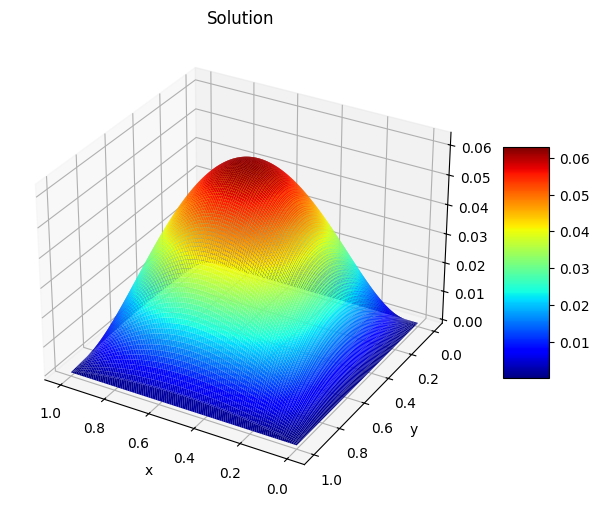

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.11339522e-05 1.21304423e-04 ... 1.74654112e-04
  1.16722786e-04 5.81188754e-05]
 [0.00000000e+00 1.21292213e-04 2.40672860e-04 ... 3.47167129e-04
  2.32173502e-04 1.15748416e-04]
 ...
 [0.00000000e+00 1.21292213e-04 2.40672860e-04 ... 3.47167129e-04
  2.32173502e-04 1.15748416e-04]
 [0.00000000e+00 1.19339868e-04 2.37236566e-04 ... 3.42711283e-04
  2.29013996e-04 1.14264396e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [15]:
x = np.arange(Nx+1)/Nx
y = np.arange(Ny+1)/Ny
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=120) 
surf = ax.plot_surface(X, Y, u, cmap='jet', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Solution')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
print(u)

# ~Аналитическое решение - Быстрое Преобразование Фурье~

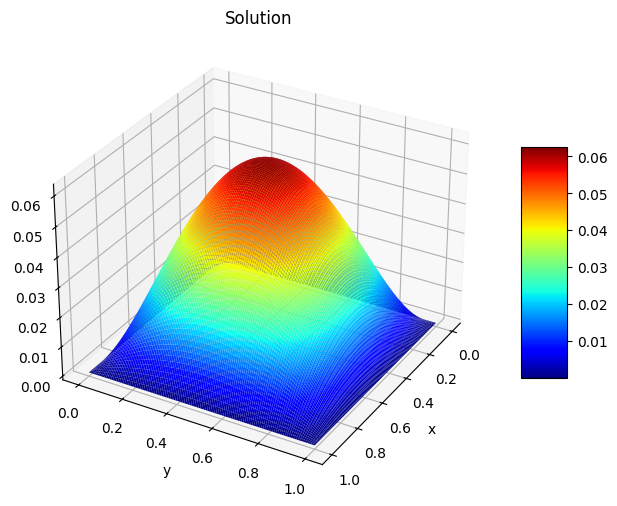

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.11339522e-05 1.21304423e-04 ... 1.74654112e-04
  1.16722786e-04 5.81188754e-05]
 [0.00000000e+00 1.21292213e-04 2.40672860e-04 ... 3.47167129e-04
  2.32173502e-04 1.15748416e-04]
 ...
 [0.00000000e+00 1.21292213e-04 2.40672860e-04 ... 3.47167129e-04
  2.32173502e-04 1.15748416e-04]
 [0.00000000e+00 1.19339868e-04 2.37236566e-04 ... 3.42711283e-04
  2.29013996e-04 1.14264396e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [16]:
x = np.arange(Nx+1)/Nx
y = np.arange(Ny+1)/Ny
an = np.zeros((Nx+1,Ny+1))
for i in range(Nx+1):
    for j in range(Ny+1):
        an[i,j] = analit(x[i],y[j])
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=30) 
surf = ax.plot_surface(X, Y, an, cmap='jet', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Solution')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
print(u)